In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fijar la semilla del generador
tf.keras.utils.set_random_seed(0)

In [3]:
df = pd.read_csv('./data/ford_train.tsv', sep='\t', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,-1,-0.797172,-0.664392,-0.373015,0.040815,0.526936,0.984288,1.353120,1.578108,1.659251,...,1.120756,0.722417,0.362068,0.092083,-0.081268,-0.212573,-0.391456,-0.664392,-1.073796,-1.564343
1,1,0.804855,0.634629,0.373474,0.038343,-0.340988,-0.740860,-1.109667,-1.395357,-1.570192,...,0.386403,0.049213,-0.258138,-0.510583,-0.683647,-0.773817,-0.785255,-0.714885,-0.560443,-0.319086
2,-1,0.727985,0.111284,-0.499124,-1.068629,-1.578351,-1.990534,-2.302031,-2.503403,-2.585211,...,0.394463,0.463685,0.507735,0.517174,0.504588,0.476270,0.438513,0.394463,0.339400,0.255391
3,-1,-0.234439,-0.502157,-0.732488,-0.946128,-1.139739,-1.323336,-1.490243,-1.607077,-1.620430,...,-0.952804,-0.929437,-0.922761,-0.929437,-0.909409,-0.835970,-0.695768,-0.478790,-0.188707,0.119736
4,-1,-0.171328,-0.062285,0.235829,0.710396,1.239969,1.649823,1.876321,1.865535,1.703751,...,0.776188,0.725496,0.697453,0.731967,0.808545,0.839823,0.733046,0.437520,-0.026585,-0.602213


In [5]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [6]:
y = (y+1)/2 # Cambiar -1 por 0 (operación vectorizada en numpy)

## Dividir en train/val 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8, random_state=0)

In [9]:
X_train.shape

(2880, 500)

In [10]:
X_val.shape

(721, 500)

## Crear modelo y entrenar

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],1,)),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    
    tf.keras.layers.Conv1D(filters=64, kernel_size=3),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    
    tf.keras.layers.GlobalAveragePooling1D(),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 498, 64)           256       
                                                                 
 batch_normalization (Batch  (None, 498, 64)           256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 498, 64)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 496, 64)           12352     
                                                                 
 batch_normalization_1 (Bat  (None, 496, 64)           256       
 chNormalization)                                                
                                                                 
 re_lu_1 (ReLU)              (None, 496, 64)           0

In [13]:
model.compile(loss='mse', ) # mse = mean squared error (error cuadrado promedio)

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32)

Epoch 1/100

90/90 [==============================] - 7s 65ms/step - loss: 0.1971 - val_loss: 0.2661
Epoch 2/100
90/90 [==============================] - 6s 62ms/step - loss: 0.1668 - val_loss: 0.2601
Epoch 3/100
90/90 [==============================] - 6s 64ms/step - loss: 0.1558 - val_loss: 0.2471
Epoch 4/100
90/90 [==============================] - 6s 62ms/step - loss: 0.1510 - val_loss: 0.2403
Epoch 5/100
90/90 [==============================] - 6s 62ms/step - loss: 0.1430 - val_loss: 0.3054
Epoch 6/100
90/90 [==============================] - 6s 62ms/step - loss: 0.1424 - val_loss: 0.2914
Epoch 7/100
90/90 [==============================] - 6s 66ms/step - loss: 0.1406 - val_loss: 0.2390
Epoch 8/100
90/90 [==============================] - 6s 70ms/step - loss: 0.1388 - val_loss: 0.1757
Epoch 9/100
90/90 [==============================] - 6s 67ms/step - loss: 0.1326 - val_loss: 0.1480
Epoch 10/100
90/90 [==============================] - 6s 68ms/step - loss: 0.1347 - val_loss: 0.132

Epoch 80/100
90/90 [==============================] - 10s 109ms/step - loss: 0.0330 - val_loss: 0.0316
Epoch 81/100
90/90 [==============================] - 7s 81ms/step - loss: 0.0308 - val_loss: 0.0278
Epoch 82/100
90/90 [==============================] - 6s 69ms/step - loss: 0.0311 - val_loss: 0.0741
Epoch 83/100
90/90 [==============================] - 6s 66ms/step - loss: 0.0311 - val_loss: 0.0325
Epoch 84/100
90/90 [==============================] - 6s 66ms/step - loss: 0.0304 - val_loss: 0.0283
Epoch 85/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0303 - val_loss: 0.0280
Epoch 86/100
90/90 [==============================] - 6s 62ms/step - loss: 0.0318 - val_loss: 0.0428
Epoch 87/100
90/90 [==============================] - 6s 63ms/step - loss: 0.0316 - val_loss: 0.0294
Epoch 88/100
90/90 [==============================] - 5s 61ms/step - loss: 0.0281 - val_loss: 0.0554
Epoch 89/100
90/90 [==============================] - 5s 58ms/step - loss: 0.0335 - val_l

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

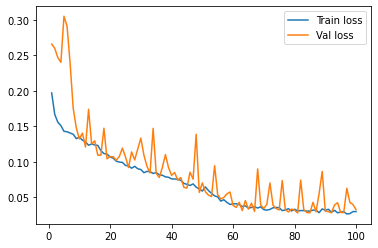

In [16]:
plt.plot(epochs, loss, label='Train loss')
plt.plot(epochs, val_loss, label='Val loss')
plt.legend()